In [159]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [188]:
import csv, functools, operator,os, re
from datetime import datetime
import pandas as pd
import numpy as np 
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

'03-26-2020'

In [239]:
#Importing the datasets for covid cases in non-US countries 
data_dir = '/Users/jaodand/Dropbox/PostDoc/Jobs:Fellowships/TDI/JHU/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports' # to read all csv files
data_files = functools.reduce(operator.add, [glob(pattern) for pattern in [
    "%s/*.csv*"%data_dir]])

#Sorting the files by dates of generation
data_files.sort(key=lambda f: datetime.strptime(re.split('\.|/',f)[-2], "%m-%d-%Y"))

In [257]:
#Exploring the dataset before analysis
df = pd.concat(map(functools.partial(pd.read_csv, sep=',', compression=None, header='infer'), data_files))

/Users/jaodand/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [261]:
df_exp = pd.read_csv(data_files[-1], sep=',', compression=None, header='infer')

colmap = {'Case-Fatality_Ratio': 'Case_Fatality_Ratio', 'Country/Region': 'Country_Region',
         'Incidence_Rate': 'Incident_Rate', 'Last Update': 'Last_Update', 'Long_': 'Longitude',
         'Province/State':'Province_State'}

# Extract all unique column names.
cols = list(set(df_exp.columns.tolist()))


# Create a new dataset matching requirements.
df = df.rename(columns=colmap).reindex(columns=cols)[df.columns]


ValueError: cannot reindex from a duplicate axis

In [244]:
df_Ind = df[df['Country/Region'].str.contains("India")]

### Temporal change in Covid cases across different provinces

/Users/jaodand/anaconda/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


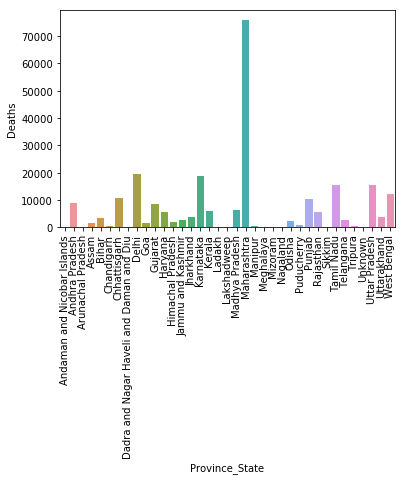

In [238]:
ax = sns.barplot(x="Province_State", y="Deaths", data=df_Ind)

plt.xticks(rotation = 90)
plt.savefig('Statewise.pdf')
plt.show()

In [154]:
df_Ind = df[df['Country_Region'].str.contains("India")]
df1 = df_Ind.transpose()
df1 = df1.drop(['Province_State', 'Country_Region', 'Lat', 'Long_'])

df1 = df1.loc[(df1 != 0).any(1)]
df1 = df1.loc[(df1 != 0).any(1)]
#df1.index = pd.to_datetime(df1.index)

In [126]:
fig = plt.figure()
plt.xticks(rotation=90, ha="right", rotation_mode="anchor") #rotate the x-axis values
plt.subplots_adjust(bottom = 0.2, top = 0.9) #ensuring the dates (on the x-axis) fit in the screen
plt.ylabel('No of Deaths')
plt.xlabel('Dates')


def buildmebarchart(i=int):
    plt.legend(df1.columns)
    p = plt.plot(df1[:i].index, df1[:i].values) #note it only returns the dataset, up to the point i
    for i in range(0,4):
        p[i].set_color(color[i]) #set the colour of each curve
        
        
import matplotlib.animation as ani
animator = ani.FuncAnimation(fig, buildmebarchart, interval = 100)
plt.show()

Index(['FIPS', 'Admin2', 'Country_Region', 'Last_Update', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'Combined_Key', 'Incident_Rate',
       'Case_Fatality_Ratio'],
      dtype='object')

In [155]:
df1

,247,248,249,250,251,252,253,254,255,256,...,274,275,276,277,278,279,280,281,282,283
FIPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Admin2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last_Update,2021-01-02 05:22:33,2021-01-02 05:22:33,2021-01-02 05:22:33,2021-01-02 05:22:33,2021-01-02 05:22:33,2021-01-02 05:22:33,2021-01-02 05:22:33,2021-01-02 05:22:33,2021-01-02 05:22:33,2021-01-02 05:22:33,...,2021-01-02 05:22:33,2021-01-02 05:22:33,2021-01-02 05:22:33,2021-01-02 05:22:33,2021-01-02 05:22:33,2021-01-02 05:22:33,2021-01-02 05:22:33,2021-01-02 05:22:33,2021-01-02 05:22:33,2021-01-02 05:22:33
Confirmed,4945,882286,16719,216211,251743,19748,279575,3378,625369,51066,...,166522,308243,5889,818014,286815,33268,0,585902,90920,552063
Deaths,62,7108,56,1045,1397,317,3371,2,10536,739,...,5341,2696,127,12122,1544,385,0,8364,1509,9712
Recovered,4826,871916,16564,211910,245476,19045,264769,3365,609322,49388,...,157496,295987,5233,797391,279456,32779,0,563278,84692,530366
Active,57,3262,99,3256,4870,386,11435,11,5511,939,...,3685,9560,529,8501,5815,104,0,14260,4719,11985
Combined_Key,"Andaman and Nicobar Islands, India","Andhra Pradesh, India","Arunachal Pradesh, India","Assam, India","Bihar, India","Chandigarh, India","Chhattisgarh, India","Dadra and Nagar Haveli and Daman and Diu, India","Delhi, India","Goa, India",...,"Punjab, India","Rajasthan, India","Sikkim, India","Tamil Nadu, India","Telangana, India","Tripura, India","Unknown, India","Uttar Pradesh, India","Uttarakhand, India","West Bengal, India"
Incident_Rate,1185.75,1636.79,1064.59,607.214,201.717,1704.66,949.765,548.622,3342.27,3219.29,...,552.47,380.393,853.168,1050.87,728.646,797.833,NaN,246.299,808.116,554.228
Case_Fatality_Ratio,1.25379,0.805634,0.334948,0.483324,0.554931,1.60523,1.20576,0.0592066,1.68477,1.44715,...,3.20738,0.874635,2.15656,1.48188,0.538326,1.15727,NaN,1.42754,1.6597,1.75922
